# Enter Student Name & ID

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
student_id = 400104686  #@param {type:"integer"}
student_name = "Parsa Yousefpoor" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400104686
your name: Parsa Yousefpoor


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [57]:
import numpy as np

In [58]:
def myPCA(X, num_components):
    translated_X = X - np.mean(X, axis=0)
    cov_matrix = np.cov(translated_X.T)
    e_values, e_vectors = np.linalg.eigh(cov_matrix)
    e_ind_order = np.flip(e_values.argsort())
    e_values = e_values[e_ind_order]
    e_vectors = e_vectors[:, e_ind_order]
    principal_components = e_vectors[:, :num_components]
    reduced_X = np.matmul(translated_X, principal_components)
    return reduced_X

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [82]:
import matplotlib as plt
from sklearn.datasets import load_iris

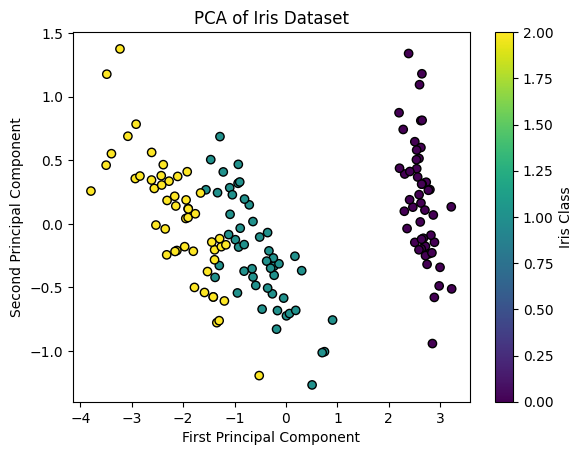

In [60]:
iris = load_iris()
X = iris.data
y = iris.target
X_r = myPCA(X,2)
plt.pyplot.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.pyplot.xlabel('First Principal Component')
plt.pyplot.ylabel('Second Principal Component')
plt.pyplot.title('PCA of Iris Dataset')
plt.pyplot.colorbar(label='Iris Class')
plt.pyplot.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces:

Eigenfaces are a set of characteristic facial features extracted from a collection of face images.

They represent the most significant variations in facial appearance across a dataset.

Eigenfaces are obtained by applying PCA to a matrix of face images, treating each image as a high-dimensional vector.

These “eigenfaces” are the eigenvectors corresponding to the largest eigenvalues of the covariance matrix of face images.

PCA and Eigenfaces Relationship:

Principal Component Analysis (PCA) is a dimensionality reduction technique.

It identifies the most important features (principal components) that explain the variance in the data.

When applied to face images, PCA extracts eigenfaces as these principal components.

The eigenfaces capture the primary modes of variation in facial appearance, such as lighting, pose, and expression.

By projecting face images onto the eigenfaces, we can represent each face using a reduced set of coefficients.

These coefficients serve as a compact representation of the face, allowing for efficient face recognition and reconstruction.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [68]:
import os
import cv2
def load_orl_dataset(dataset_path, img_size=(48, 48)):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for person_id in range(40):
        person_path = os.path.join(dataset_path, f's{person_id + 1}')
        for img_id in range(10):
            img_path = os.path.join(person_path, f'{img_id + 1}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size).flatten()
            if img_id < 5:
                X_train.append(img)
                y_train.append(person_id)
            else:
                X_test.append(img)
                y_test.append(person_id)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_train, y_train, X_test, y_test = load_orl_dataset('drive/My Drive/ORL')

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [76]:
from sklearn.decomposition import PCA
num_components = 45
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
lda = LDA()
lda.fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the LDA classifier on PCA-transformed data:", 100 * accuracy)

Accuracy of the LDA classifier on PCA-transformed data: 93.5


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Accuracy with 100 components: 0.8900
Accuracy with 99 components: 0.8950
Accuracy with 98 components: 0.9000
Accuracy with 97 components: 0.9050
Accuracy with 96 components: 0.8900
Accuracy with 95 components: 0.9350
Accuracy with 94 components: 0.9250
Accuracy with 93 components: 0.9200
Accuracy with 92 components: 0.9400
Accuracy with 91 components: 0.9400
Accuracy with 90 components: 0.9300
Accuracy with 89 components: 0.9250
Accuracy with 88 components: 0.9250
Accuracy with 87 components: 0.9200
Accuracy with 86 components: 0.9200
Accuracy with 85 components: 0.9250
Accuracy with 84 components: 0.9250
Accuracy with 83 components: 0.9100
Accuracy with 82 components: 0.9150
Accuracy with 81 components: 0.9300
Accuracy with 80 components: 0.9250
Accuracy with 79 components: 0.9250
Accuracy with 78 components: 0.9250
Accuracy with 77 components: 0.9250
Accuracy with 76 components: 0.9300
Accuracy with 75 components: 0.9250
Accuracy with 74 components: 0.9300
Accuracy with 73 components

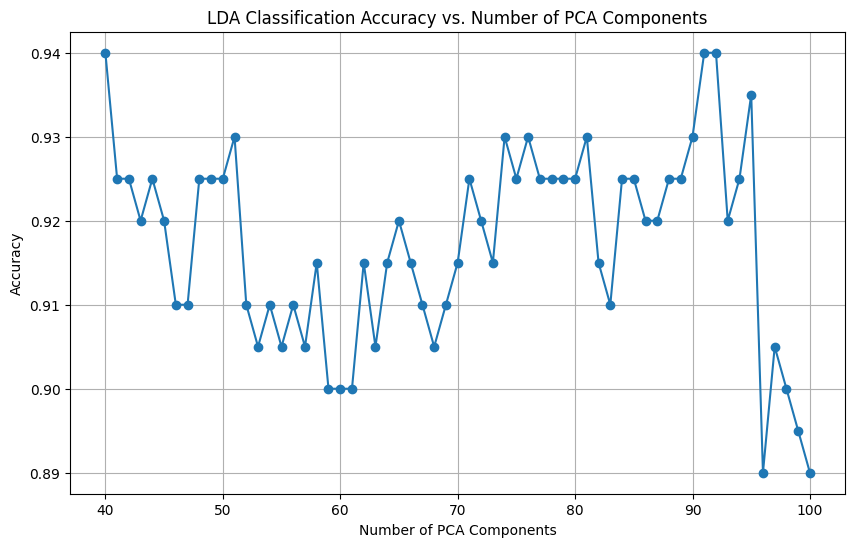

The optimal number of PCA components is: 92


In [84]:
import matplotlib.pyplot as plt
components_range = list(range(100, 39, -1))
accuracies = []
for num_components in components_range:
    pca = PCA(n_components = num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {num_components} components: {accuracy:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o')
plt.title('LDA Classification Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

optimal_components = components_range[np.argmax(accuracies)]
print(f"The optimal number of PCA components is: {optimal_components}")